# Piet Mondrian

inspiration: Composition with grid 8 (check it out on [Wikimedia](https://commons.wikimedia.org/wiki/Category:Composition_with_grid_8:_checkerboard_composition_with_dark_colors_(0334326)))
In 1918, after World War I, Mondrian returned to France and embraced abstract art. Shortly after his return he started working on his grid-based paintings and became one of the most prominent advocate of Neoplasticism.
While his red-yellow-blue composition from the Twenties beacame his signature style, here I will focus on his Grid8 from 1919.
It's facinating how this artwork is visually similar to a grid heat map, especially considering that one of the the oldest example of this type of chat was created by Toussaint Loua to visualize social statistics across the districts of Paris (check it out on [Wikimedia](https://commons.wikimedia.org/wiki/File:Loua.png)) in 1873. 
It is well-known how Mondrian work was influenced by mathematics and painted by applying the most elementary principles through plainly rational means, like Renaissence algebra rules. However, I never found any indication that he may have known about the state of the art in data visualization.

## The data
This visualization uses the monthly number of reported arrests for various offenses reported by participating law enforcement agencies in the USA. 
The data was downloaded from the [Crime Data Explorer](https://crime-data-explorer.fr.cloud.gov/#).

## The data
This visualization uses the hourly geographically aggregated weather data for Europe. 
The data was downloaded from [Data Platform](https://data.open-power-system-data.org/weather_data/2020-09-16).

In [53]:
import copy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# df = pd.read_csv('./data/arrests_national.csv')
# df = df.drop( columns = ['id', 'population', 'total_arrests', 'other'])
# df = df.set_index('year')
# df.head(3)

# plt.figure(figsize=(10, 10))
# sns.heatmap(df)
# # decrease by year

In [31]:
# df = pd.read_csv('./data/Data_Set_Final_LTD_Slope_Intercept.tab', sep='\t')
# print(df.columns.values)
# df = df[['County', 'LungCancer', 'PM2.5', 'PM10', 'SO2', 'NO2', 'O3', 'CO', 'CN', 'Disel', 'CS2']]
# df = df.set_index('County')
# df.head(3)

In [30]:
# df_pollutants = df[['PM2.5', 'PM10', 'SO2', 'NO2', 'O3', 'CO', 'CN', 'Disel', 'CS2']]
# plt.figure(figsize=(10, 10))
# sns.heatmap(df_pollutants.corr())

In [47]:
# df = pd.read_csv('./data/weather_data.csv')
# df = df.drop(columns='utc_timestamp')
# print(list(df.columns))
# nation = [col for col in df.columns if 'GR' in col]
# print(nation)
# df = df[nation]
# df.head(3)

In [63]:
df = pd.read_csv('./data/weather-ra-2021.csv')
df['FENOMENI'].fillna('sole', inplace=True)
print(list(df.columns))
df.head(3)

['DATA', 'TMEDIA', 'TMIN', 'TMAX', 'PUNTORUGIADA', 'UMIDITA_percent', 'VISIBILITA_km', 'VENTOMEDIA_kmorari', 'VENTOMAX_kmorari', 'RAFFICA_kmorari', 'PRESSIONESLM_mb', 'PRESSIONEMEDIA_mb', 'PIOGGIA_mm', 'FENOMENI']


,DATA,TMEDIA,TMIN,TMAX,PUNTORUGIADA,UMIDITA_percent,VISIBILITA_km,VENTOMEDIA_kmorari,VENTOMAX_kmorari,RAFFICA_kmorari,PRESSIONESLM_mb,PRESSIONEMEDIA_mb,PIOGGIA_mm,FENOMENI
0,1/8/2021,26.0,22.0,32.0,18.0,64.0,20.0,17.0,39.0,0.0,1005.0,0.0,0.0,pioggia temporale
1,2/8/2021,26.0,21.0,31.0,16.0,56.0,19.0,17.0,28.0,0.0,1011.0,0.0,0.0,sole
2,3/8/2021,24.0,15.0,32.0,14.0,56.0,18.0,12.0,28.0,0.0,1013.0,0.0,0.0,sole


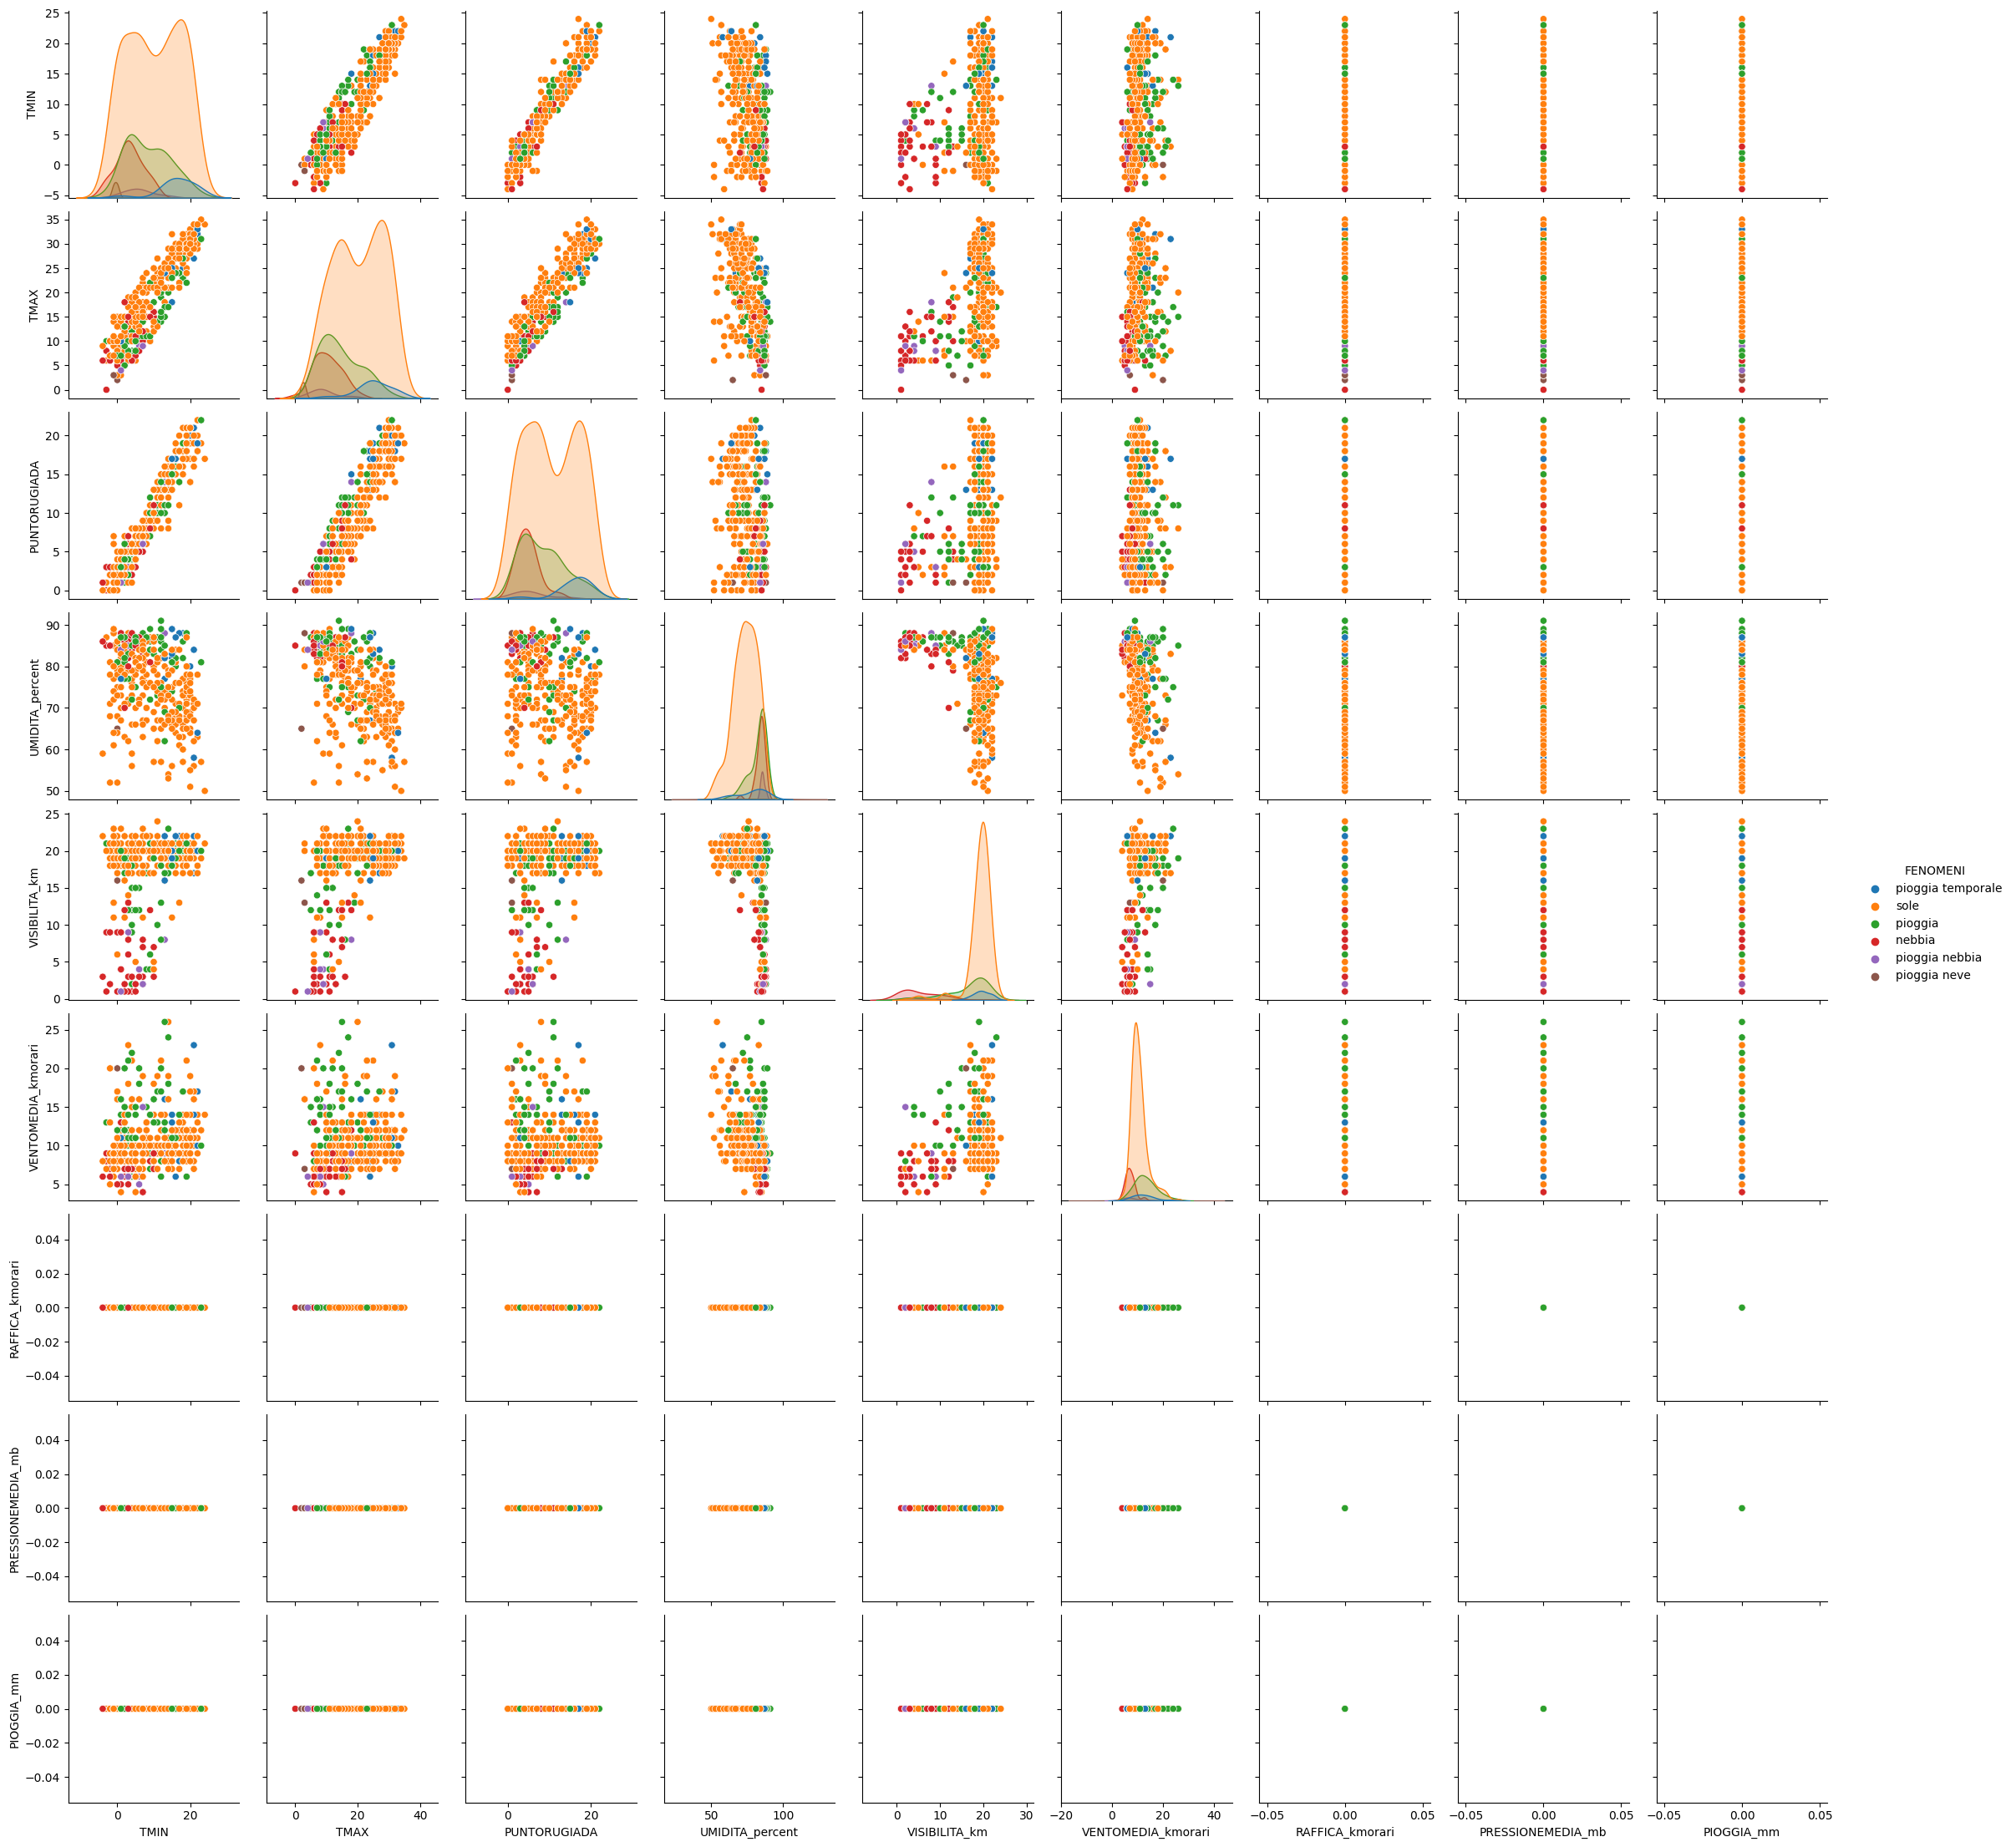

In [64]:
sns.pairplot(df, hue='FENOMENI', vars=['TMIN', 'TMAX', 'PUNTORUGIADA', 'UMIDITA_percent', 'VISIBILITA_km', 'VENTOMEDIA_kmorari', 'RAFFICA_kmorari', 'PRESSIONEMEDIA_mb', 'PIOGGIA_mm'])

<AxesSubplot: >

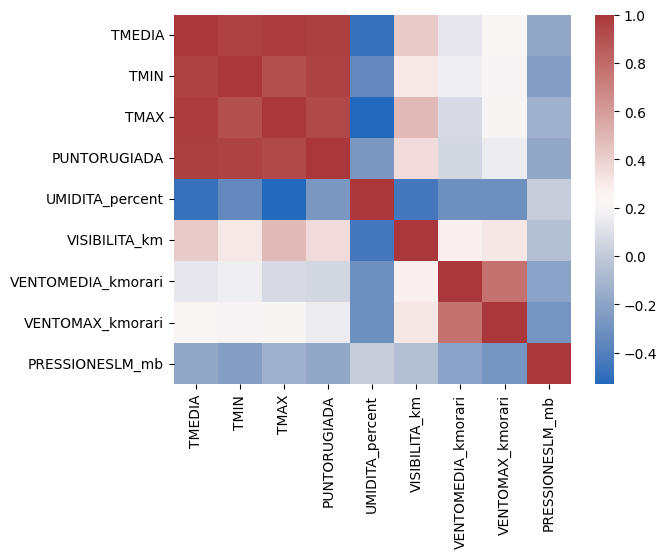

In [58]:
df_heat = copy.copy(df)
df_heat = df_heat.drop(columns=['RAFFICA_kmorari', 'PRESSIONEMEDIA_mb', 'PIOGGIA_mm'])
sns.heatmap(df_heat.corr(), cmap='vlag')